<a href="https://colab.research.google.com/github/lucaskrlima/demonstracao-financeira-python/blob/main/relatorio_financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

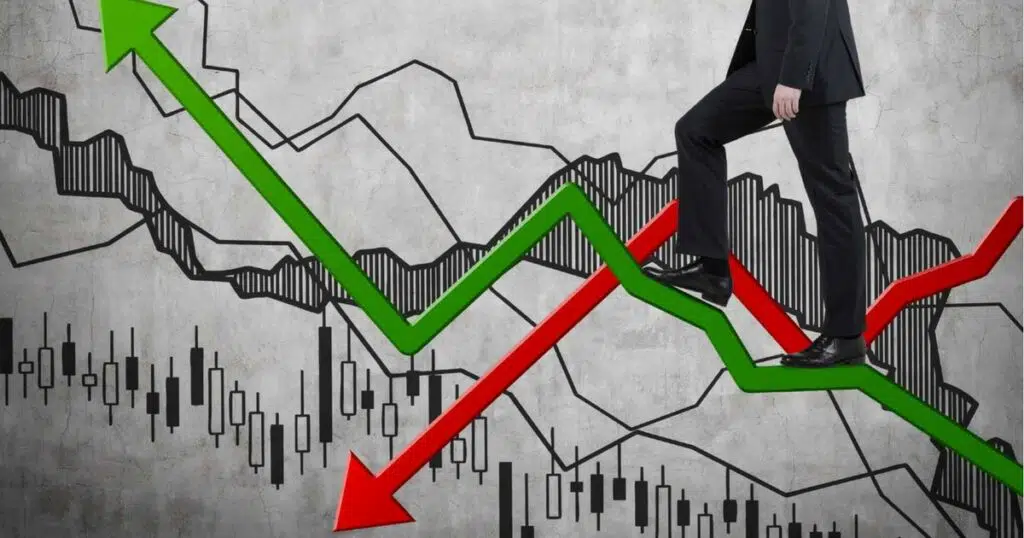

# Descrição do Projeto
Você trabalha para um fundo de hedge e seu gestor deseja uma análise rápida sobre a lucratividade e a alavancagem de empresas de vários setores.

Seu gerente está particularmente interessado em investir em empresas imobiliárias e se pergunta se empresas imobiliárias altamente alavancadas são mais lucrativas.

Construa um relatório financeiro para avaliar a lucratividade e alavancagem de empresas de todos os setores.

* Perguntas de negócio:

* 1 - Qual tipo de empresa apresenta o menor índice de lucratividade?
* 2 - Qual tipo de empresa tem o maior índice de alavancagem?
* 3 - Qual a relação entre alavancagem e rentabilidade nas imobiliárias representadas nestes dados? É "positivo", "negativo" ou "sem relacionamento?"

In [1]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
#lendo dados dos arquivos xls e carregando em um df
balanco_patrimonial = pd.read_excel('/content/Balance_Sheet.xlsx')
demonstracao_resultado = pd.read_excel('/content/Income_Statement.xlsx')

In [3]:
#Visualizando cabeçalho df balanco patrimonial
balanco_patrimonial.head()

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [4]:
#Visualizando cabeçalho df demonstracao resultado
demonstracao_resultado.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [5]:
#verificando inforações do dataset
balanco_patrimonial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [6]:
demonstracao_resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                60 non-null     int64 
 1   Year                      60 non-null     int64 
 2   comp_type                 60 non-null     object
 3   company                   60 non-null     object
 4   Cost Of Goods Sold        60 non-null     int64 
 5   Gross Profit              60 non-null     int64 
 6   Operating Income          60 non-null     int64 
 7   Total Operating Expenses  60 non-null     int64 
 8   Total Revenue             60 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.3+ KB


In [9]:
#Renomeando as colunas para o portugues df balanco patrimonial
balanco_patrimonial = balanco_patrimonial.rename(columns={'Year':'Ano',
                                                          'comp_type':'tipo_emp',
                                                          'company':'empresa',
                                                          'Accounts Payable':'Contas a Pagar',
                                                          'Cash':'Dinheiro',
                                                          'Inventory':'Inventario',
                                                          'Property Plant Equipment':'Equipamento Planta de propriedade',
                                                          'Short Term Investments':'Investimento curto prazo',
                                                          'Total Assets':'Ativos Totais',
                                                          'Total Current Assets':'Ativo Circulante Total',
                                                          'Total Current Liabilities':'Passivo Circulante Total',
                                                          'Total Liab':'Passivo Total',
                                                          'Total Stockholder Equity':'Patrimonio Liq total'})

In [10]:
balanco_patrimonial.head()

,Unnamed: 0,Ano,tipo_emp,empresa,Contas a Pagar,Dinheiro,Inventario,Equipamento Planta de propriedade,Investimento curto prazo,Ativos Totais,Ativo Circulante Total,Passivo Circulante Total,Passivo Total,Patrimonio Liq total
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [12]:
#Renomeando para o portugues cabeçalho df demonstracao de resultado
demonstracao_resultado = demonstracao_resultado.rename(columns={'Year':'Ano',
                                                          'comp_type':'tipo_emp',
                                                          'company':'empresa',
                                                          'Cost Of Goods Sold':'Custos de bens vendidos',
                                                          'Gross Profit':'Lucro Bruto',
                                                          'Operating Income':'Lucro Operacional',
                                                          'Total Operating Expenses':'Totais Despesa Operacionais',
                                                          'Total Revenue':'Rendimento Total'
                                                        })

In [13]:
demonstracao_resultado.head()

,Unnamed: 0,Ano,tipo_emp,empresa,Custos de bens vendidos,Lucro Bruto,Lucro Operacional,Totais Despesa Operacionais,Rendimento Total
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [14]:
#Mesclando os dois df e denominando como indice
df_indice = pd.merge(demonstracao_resultado, balanco_patrimonial, on=["Ano", "tipo_emp", "empresa"])

In [15]:
#Exibindo o dataframe mesclado
df_indice.head()

,Unnamed: 0_x,Ano,tipo_emp,empresa,Custos de bens vendidos,Lucro Bruto,Lucro Operacional,Totais Despesa Operacionais,Rendimento Total,Unnamed: 0_y,Contas a Pagar,Dinheiro,Inventario,Equipamento Planta de propriedade,Investimento curto prazo,Ativos Totais,Ativo Circulante Total,Passivo Circulante Total,Passivo Total,Patrimonio Liq total
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,0,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,1,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,2,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,3,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,4,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [46]:
#Cria uma coluna de indice de lucratividade e calcula o indice
df_indice["indice_lucratividade"]=(df_indice["Rendimento Total"]
                                  -df_indice["Totais Despesa Operacionais"])/df_indice["Rendimento Total"]

In [23]:
#Cria coluna taxa de alavancagem e calcula a relação divida/capital próprio
df_indice["taxa_de_alavancagem"]=df_indice["Passivo Total"]/df_indice["Patrimonio Liq total"]

In [24]:
#Calcula o indice do multiplicador de patrimonio
df_indice["taxa_de_alavancagem"]=df_indice["Ativos Totais"]/df_indice["Patrimonio Liq total"]

In [42]:
#Usando tabela dinâmica(pivot_table) para filtrar qual tipo de empresa tem menor lucratividade
print(df_indice.pivot_table(index="tipo_emp", values="indice_lucratividade"))

          indice_lucratividade
tipo_emp                      
fmcg                  0.207112
real_est              0.299938
tech                  0.273889


Respondendo a primeira pergunta, qual tipo de empresa apresenta o menor índice de lucratividade?

Pode-se concluir que as empresas de bens de consumo(fmcg) possuem a menor taxa de lucrativa, aproximadamente 21%.

In [29]:
#Usando tabela dinâmica(pivot_table) para filtrar qual tipo de empresa tem maior indice de alavancagem médio
print(df_indice.pivot_table(index="tipo_emp", values="taxa_de_alavancagem"))

          taxa_de_alavancagem
tipo_emp                     
fmcg                 4.049784
real_est             7.353476
tech                 2.777448


Respondendo a segunda pergunta, qual tipo de empresa tem o maior índice de alavancagem?

Em relação a empresa com maior índice de alavancagem, nota-se as empresas do setor imobiliário(real_est), com indice de 7.35.

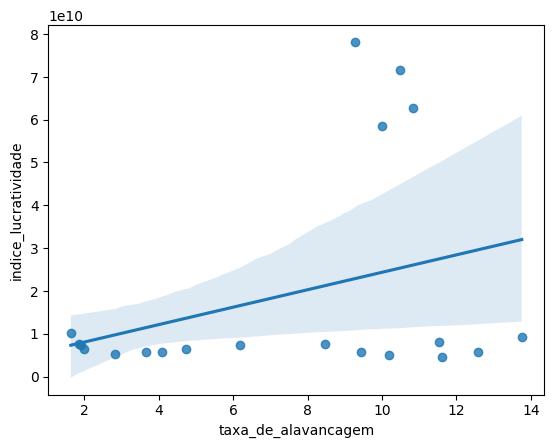

In [36]:
#Verificando se as empresas imobiliárias com maior índice de alavancagem têm maior lucratividade
df_invest_imovel=df_indice.loc[df_indice["tipo_emp"]=="real_est"]

plot = sn.regplot(data=df_invest_imovel, x="taxa_de_alavancagem", y="indice_lucratividade")


Concluindo com a terceira pergunta, qual a relação entre alavancagem e rentabilidade nas imobiliárias representadas nestes dados? É "positivo", "negativo" ou "sem relacionamento?"

De acordo com o gráfico de dispersão podemos verificar que há uma correlação positiva, ou seja a medida que a taxa de alavancagem aumenta o índice de lucratividade também aumtenta.